<a href="https://colab.research.google.com/github/EcoLabBET/ExOrChiST/blob/main/Examples/Measures-of-Centrality_Rose-Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<u>**Notebook Overview**</u>

This notebook demonstrates the use of **RangeShifts** functionality to:  
1. Calculate **centrality measures** for species ranges.  
2. Generate **rose plots** visualizing the distribution and magnitude of movement in centrality points across all considered species.  

<u>**Workflow**</u>
1. **Install Required Packages**  
   - Necessary libraries are installed to enable the analysis.  

2. **Load Toy Dataset & Calculate Centrality Measures**  
   - Artificial data have been created for Ireland, where for every species each hectad is either occupied or not, mimicking the original dataset.

   - **Hectad Representation**: For each polygon (hectad) the centroid is calculated and used as the point representing the entire cell.
   
   - This dataset is used to compute three centrality metrics for each species range across different time periods. These centrality points represent the overall species range:  
     - **Centroid**: The arithmetic mean (center of mass) of all points.  
       *Note*: For geographical contexts, see [Geographical Centre (Wikipedia)](https://en.wikipedia.org/wiki/Geographical_centre).  
     - **Naive Median**: The point derived by calculating the median for each dimension independently.  
     - **Geometric Median**: The point minimizing the sum of distances given a set of points (a multidimensional generalization of the median, also known as the *Weber-Fermat Point*).  For the calculation, the Weiszfeld algorithm is used, based on the implementation here: https://gist.github.com/endolith/2837160.

   -

3. **Generate Rose Plots**  
   - Visualizations are created to display directional trends and magnitudes in centrality shifts over time.  

## Installation

In [1]:
# Install RangeShifts library from GitHub
!pip install -q git+https://github.com/EcoLabBET/RangeShifts.git

# Install Required packages
!pip install pygeodesy windrose

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00


In [2]:
# Clone the repository to access all files
!git clone https://github.com/EcoLabBET/ExOrChiST.git
%cd ExOrChiST

Cloning into 'ExOrChiST'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 56 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 2.85 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/ExOrChiST


## Calculate Centrality Points


In [3]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

# Read coastline data
coastline = gpd.read_file('Toy_Dataset/IR_coastline_epsg_29903.gpkg').to_crs('epsg:4326')

# Read CSV data and convert WKT strings to geometries
data = pd.read_csv('Toy_Dataset/toy_dataset.csv')
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data, geometry='geometry').set_crs(epsg=4326)

data.head()

,time_periods,GridRef,Sp01,Sp02,Sp03,Sp04,Sp05,Sp06,Sp07,Sp08,...,Sp12,Sp13,Sp14,Sp15,Sp16,Sp17,Sp18,Sp19,Sp20,geometry
0,2010-2020,B60,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,"POLYGON ((-8.62341 54.84617, -8.6248 54.936, -..."
1,2010-2020,B61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-8.6248 54.936, -8.62619 55.02582, -..."
2,2010-2020,B70,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"POLYGON ((-8.46775 54.84687, -8.46879 54.9367,..."
3,2010-2020,B71,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((-8.46879 54.9367, -8.46984 55.02652,..."
4,2010-2020,B72,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,"POLYGON ((-8.46984 55.02652, -8.47089 55.11634..."


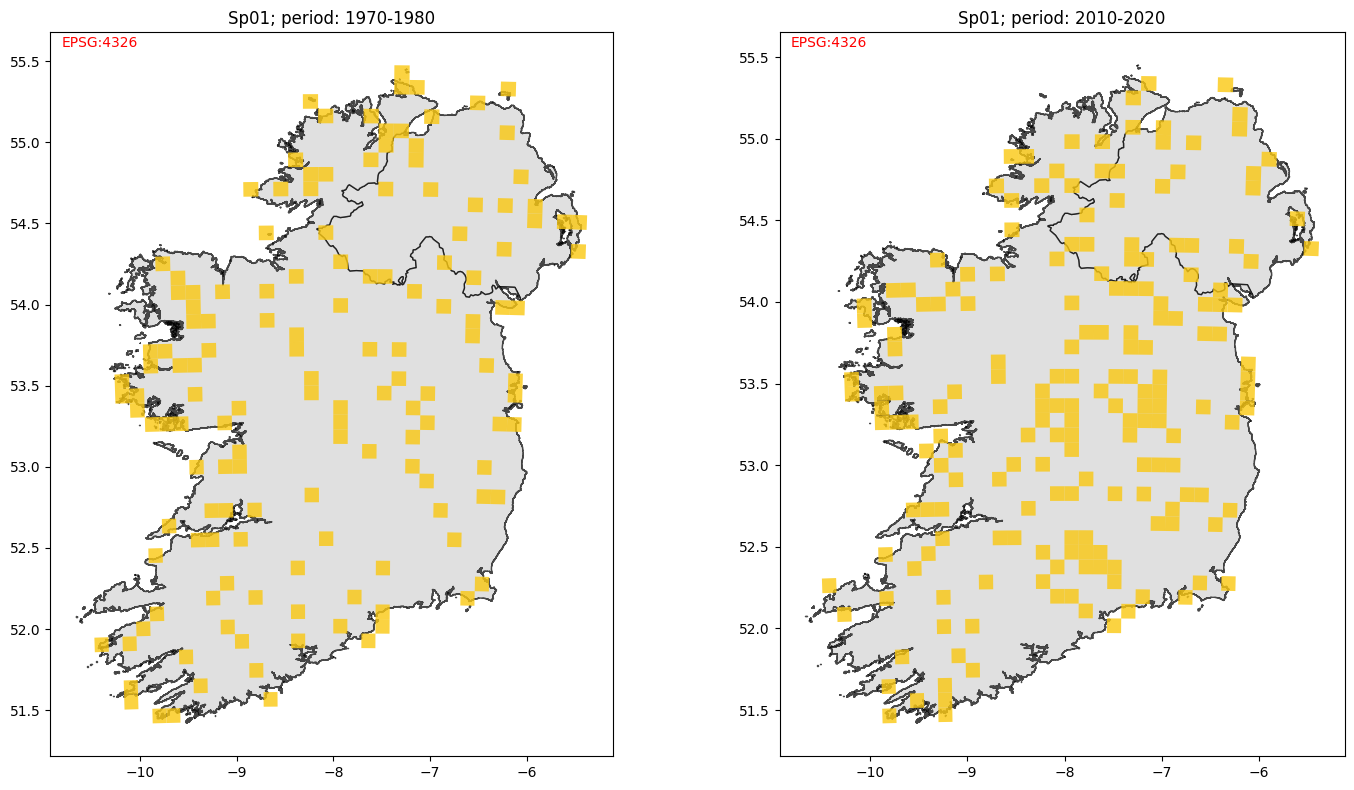

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# --- Setup ---
# Get unique time periods and sort them
periods = np.sort(data['time_periods'].unique())  # Sorted list of time periods (e.g., [1, 2])

# Initialize figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns

# --- Plot Coastline Background ---
for ax in axes:
    coastline.plot(ax=ax, color='lightgrey', alpha = 0.7, edgecolor='black')

# --- Plot Species Data (Sp01) for Each Time Period ---
for i, tp in enumerate(periods):
    subset = data[(data['time_periods'] == tp) & (data['Sp01'] > 0)]
    subset['geometry'].plot(ax=axes[i],color = '#fac811',alpha = 0.8)
    axes[i].set_title(f"Sp01; period: {tp}")
    axes[i].text(0.02,0.98,f'{subset.crs}',transform=axes[i].transAxes,color='red')



# --- Display Adjustments ---
plt.tight_layout()
plt.show()

In [5]:
from tqdm import tqdm
from RangeShifts.Range import Range
from RangeShifts.RangeCollection import RangeCollection

# --- Initialize DataFrames to store point metrics ---
columns = ['t1', 't2']  # Columns for time-period coordinates
centroids = pd.DataFrame(columns=columns)
naive_medians = pd.DataFrame(columns=columns)
geometric_medians = pd.DataFrame(columns=columns)

# --- Process each species ---
species = data.columns[2:-1]  # Exclude non-species columns (assuming first 2 and last are metadata)
for sp in tqdm(species, desc="Processing species"):
    # Filter data for current species (presence > 0)
    subset = data[data[sp] > 0][['time_periods', 'GridRef', sp, 'geometry']]

    # Initialize RangeCollection for temporal analysis
    time_series = RangeCollection()
    time_series.name = sp  # Set species identifier

    # Parse time periods (assuming format 'YYYY-YYYY')
    date_ranges = data['time_periods'].unique()  # Use full dataset to capture all periods
    time_series.time_points = {
        'start': [float(date.split('-')[0]) for date in date_ranges],
        'end': [float(date.split('-')[1]) for date in date_ranges],
        'mid': [(float(date.split('-')[0]) + float(date.split('-')[1])) / 2
                for date in date_ranges]  # Precompute midpoints
    }

    # Process each time period
    for date in date_ranges:
        group = subset[subset['time_periods'] == date]
        range_obj = Range(group)
        range_obj.name = date
        range_obj.geometric_median  # Trigger calculation (if not auto-computed)
        time_series.append(range_obj)

    # Ensure consistent CRS
    time_series.reproject(subset.crs)

    # Helper function to append results cleanly
    def append_data(df, columns, values, loc):
        """Safely append values to a DataFrame at specified location."""
        df.loc[loc] = dict(zip(columns, values))

    # Store computed metrics
    append_data(centroids, columns, time_series.centroids, loc=time_series.name)
    append_data(naive_medians, columns, time_series.naive_medians, loc=time_series.name)
    append_data(geometric_medians, columns, time_series.geometric_medians, loc=time_series.name)

Processing species: 100%|██████████| 20/20 [00:05<00:00,  3.85it/s]


<font color='orange'>
<b>Note:</b> </font> It is easier to extract data from the <b>time_series</b> object than from the <b>range</b> object.
Thus we initially generate multiple dataframes and then melt them to long format.
</font>

In [6]:
def melt_df(df,name):
  'Just a wrapper to do the task more cleanly.'
  df = df.reset_index(names='sp_code')

  return pd.melt(df, id_vars=['sp_code'],
                 value_vars=['t1','t2'],  var_name='Time',
                 value_name=name)

# Convert each metric to long format
df1 = melt_df(centroids, 'centroids')
df2 = melt_df(naive_medians, 'naive_medians')
df3 = melt_df(geometric_medians, 'geometric_medians')

# Merge all metrics into one dataframe
centrality_points = (
    pd.merge(df1, df2, on=['sp_code', 'Time'])
      .merge(df3, on=['sp_code', 'Time'])
)

# Save results
centrality_points.to_csv('centrality_points.csv', index=False)
print("Saved results to 'centrality_points.csv'")

Saved results to 'centrality_points.csv'


## Visualisation in Rose Plots

We will reload `.csv` containing the the computed centrality points, visualise it, and compute the movement of the points.

In [7]:
# --- Data Preparation ---
df = pd.read_csv('centrality_points.csv')

# Convert WKT strings to shapely geometries
geometry_columns = ['centroids', 'naive_medians', 'geometric_medians']
for col in geometry_columns:
    df[col] = df[col].apply(wkt.loads)

# --- Display ---
df

,sp_code,Time,centroids,naive_medians,geometric_medians
0,Sp01,t1,POINT (-7.92986712561373 53.41164778869269),POINT (-7.836339179014614 53.36538601924313),POINT (-7.856798601736812 53.39024449798569)
1,Sp02,t1,POINT (-7.88402085772848 53.59145435067703),POINT (-7.92220527549065 53.63435556863267),POINT (-7.903107266065139 53.654445920435215)
2,Sp03,t1,POINT (-7.807069946845547 53.701081968724274),POINT (-7.772493117796465 53.80597606249781),POINT (-7.761630903743335 53.81702165981554)
3,Sp04,t1,POINT (-7.857338911095351 53.760607899459295),POINT (-7.855432219360366 54.07239699093589),POINT (-7.7506603591078305 53.97186163962036)
4,Sp05,t1,POINT (-8.104494713335328 53.290000537621175),POINT (-8.080446530257744 53.35065224583718),POINT (-8.108685243159917 53.30324952227144)
5,Sp06,t1,POINT (-7.89436148732484 53.57193575681747),POINT (-7.833112952960402 53.723338013737035),POINT (-7.819288654719149 53.666457611826004)
6,Sp07,t1,POINT (-8.064867318631734 53.477980928280026),POINT (-8.087162319868652 53.54318164350264),POINT (-8.046933036309577 53.540513452337706)
7,Sp08,t1,POINT (-7.936467990006019 53.48169608963695),POINT (-7.860705079802218 53.53899434553552),POINT (-7.88081287589874 53.53280719581172)
8,Sp09,t1,POINT (-8.029357886622945 53.33163691260068),POINT (-8.075684319428559 53.2755356760625),POINT (-8.075684319417558 53.27553567621544)
9,Sp10,t1,POINT (-7.86823025909697 53.47820894397421),POINT (-7.893005291857485 53.492726918059816),POINT (-7.894156832891351 53.496182108748215)


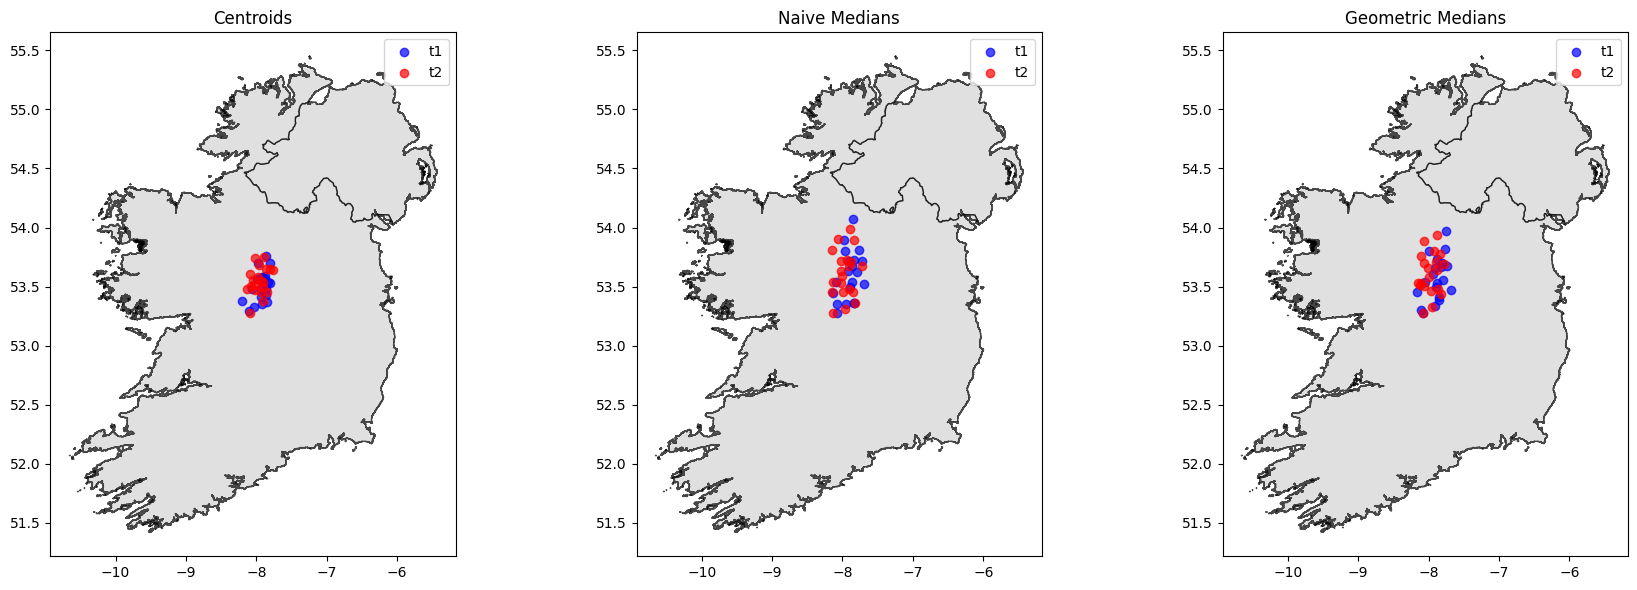

In [8]:

# --- Visualization Setup ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_titles = ['Centroids', 'Naive Medians', 'Geometric Medians']
time_colors = {'t1': 'blue', 't2': 'red'}

# --- Plot Coastline Background ---
for ax in axes:
    coastline.plot(ax=ax, color='lightgrey', alpha = 0.7, edgecolor='black')

# --- Plot points for each time period and centrality measure ---
for time, color in time_colors.items():
    subset = df[df['Time'] == time]

    for i, col in enumerate(geometry_columns):
        x_coords = [p.x for p in subset[col]]
        y_coords = [p.y for p in subset[col]]

        axes[i].scatter(x_coords, y_coords,
            marker='o', color=color, alpha=0.7,
            label=time)

# --- Add titles and legends ---
for ax, title in zip(axes, plot_titles):
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()



Due to the random nature of the dataset, we expect no significant movement patterns across time periods (t1 and t2). Since most species have the entire island as their range, centrality points should cluster near the island's center. However, the three metrics xhibit distinct behaviors:

1. Centroids  (Arithmetic Mean): Captures the average spatial distribution of points. Spread is relatively balanced but they slightly reflect the island's elongation.

2. Naive Medians (Coordinate-wise Median): Shows pronounced latitudinal (y-axis) spread, likely due to the island's north-south asymmetry. More prone to "jumps" between t1 and t2 due to per-axis sensitivity.

3. Geometric Medians (Weber-Fermat Point): Spread is reduced compared to naive medians, as it accounts for spatial relationships. Captures the island's shape more accurately by balancing both axes.

Given the current dataframe, we will reorganise it and calculate the movement of each centrality point between two time-points, for all species. The following functions are constructed:




1.   `make_pairs(df, variable)`:
  *  **Purpose**:  Structures geographic points into time-ordered pairs for easy calculation
  * **Output**:  DataFrame with columns like `t1→t2` containing tuples `(P_t1, P_t2)` of Shapely Points.


2.   `Vincenty_distance(pair)`:
  * **Purpose**:  Computes precise geodesic distance and bearing between two points using the OSGB36 datum (optimized for UK)
  * **Output**:  List `[distance_km, bearing_degrees]`
  * **Notes**: Calculates Vincenty distance (meters → km) and initial bearing (degrees)

3. `calc_distance(df)`:
  * **Purpose**: Applies `Vincenty_distance()` to each pair column, splits results into two new columns per pair, replacing the original column:  
    - `[column_name].dist` (distance in km)  
    - `[column_name].bear` (bearing in degrees)
  * **Output**:  DataFrame with movement statistics only  


**Execution Flow:**

`make_pairs()` → `calc_distance()` (applies `Vincenty_distance`) → Merge results for all 3 centrality measures


In [9]:
from itertools import combinations

def make_pairs(df, var):
    # Keep only needed columns
    df = df[['sp_code', 'Time', var]]

    # Get sorted unique time points
    times = sorted(df['Time'].unique())

    # Pivot to wide format (species x time)
    df = df.pivot(index='sp_code', columns='Time', values=var)
    df.columns.name = None

    # Create all time pairs with combined values
    for t1, t2 in combinations(times, 2):
        df[f'{t1}\u27F6{t2}'] = list(zip(df[t1], df[t2]))

    return df.drop(columns=times)  # Remove original time columns


In [10]:
from pygeodesy.ellipsoids import Ellipsoids
from pygeodesy import Datums
from pygeodesy.ellipsoidalVincenty import LatLon

def Vincenty_distance(pair):
    """
    Calculate geodesic distance between two Shapely Point (epsg:4326) objects using Vincenty formulae.
    Internally it converts to the ellipsoid of the OSGB36 (Britain)
    Internally calculates distance in km
    """
    p1,p2 = pair

    p1 = LatLon(p1.y, p1.x).toDatum(Datums.OSGB36)
    p2 = LatLon(p2.y, p2.x).toDatum(Datums.OSGB36)

    distance = p1.distanceTo(p2) / 10**3 #convert to km
    init_bearing = p1.bearingTo(p2)

    return [distance,init_bearing]

def calc_distance(df):
  """
  Calculates the distance to the pairs generated before.
  """
  for col in df.columns:
    df[[f'{col}.dist',f'{col}.bear']] = df[col].apply(lambda pair: pd.Series(Vincenty_distance(pair)))
    df.drop(columns=col, axis=1, inplace=True)

  return df

In [11]:
# --- Calculate Distance and Bearings ---
df1 = calc_distance(make_pairs(df, 'centroids')).rename(columns=lambda x: 'centroids.' + x)
df2 = calc_distance(make_pairs(df, 'naive_medians')).rename(columns=lambda x: 'naive_medians.' + x)
df3 = calc_distance(make_pairs(df, 'geometric_medians')).rename(columns=lambda x: 'geometric_medians.' + x)

df = pd.merge(df1, df2, on=['sp_code']).merge(df3,on=['sp_code'])
df

,centroids.t1⟶t2.dist,centroids.t1⟶t2.bear,naive_medians.t1⟶t2.dist,naive_medians.t1⟶t2.bear,geometric_medians.t1⟶t2.dist,geometric_medians.t1⟶t2.bear
sp_code,,,,,,
Sp01,14.070911,315.403910,22.080945,326.276535,22.497830,313.271005
Sp02,6.106172,10.582683,4.395013,15.690211,5.638515,6.964780
Sp03,21.081369,240.356884,24.986250,270.592975,24.211583,254.617057
Sp04,3.014484,242.511683,10.102515,197.000671,9.253346,246.851055
Sp05,20.809515,353.524184,12.417072,339.645526,25.251677,352.694396
Sp06,3.800699,219.028972,18.748471,217.142505,14.973422,229.385729
Sp07,8.653746,6.018301,20.140792,13.098701,17.584828,357.041817
Sp08,3.348678,183.386996,9.345867,178.716859,10.170013,217.159138
Sp09,9.350826,58.535373,8.114188,59.047292,10.298874,55.593811


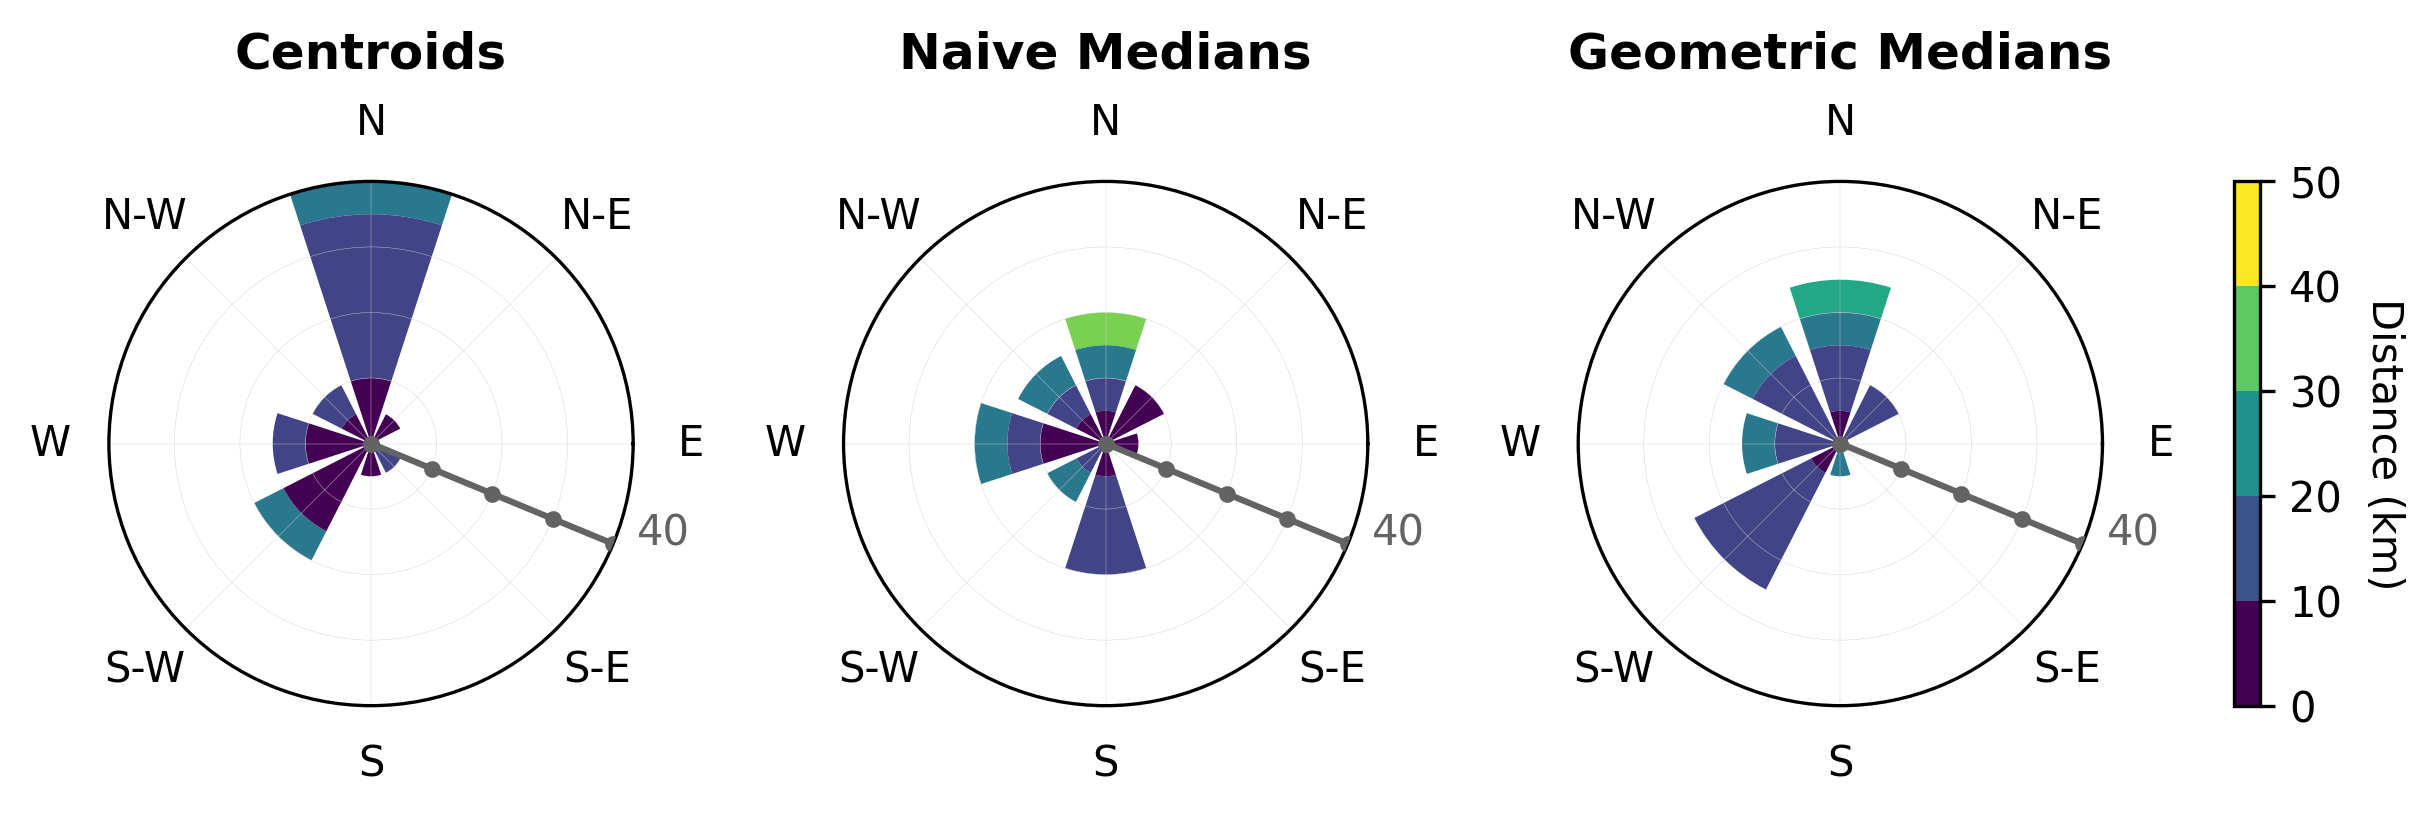

In [13]:
import sys
sys.path.append('scripts')  # Adds 'scripts' folder to Python path
from RosePlots import *

plt.ioff()  #Disables interactive plotting (prevents auto-display)

# Figure layout configuration
mosaic = [['centroids.t1⟶t2', 'naive_medians.t1⟶t2', 'geometric_medians.t1⟶t2','cbar']]
gridspec_kw = {
    "height_ratios": [1],
    "width_ratios": [1,1,1,0.05],
    "wspace": 0.1
}

# Visualise
create_windrose_figure(df, mosaic, gridspec_kw=gridspec_kw)